In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.400000,0.857143,0.545455,1.527039e+00,8.790366,5.073413e+00,1.403137e+05,374.584681,185.851834,2744.368497,3.606716e+01,6.004636e+00,2.0,0.18
1,1.000000,1.000000,1.000000,1.781590e-07,0.000001,3.057910e-07,4.011310e-11,0.000006,0.000004,0.000045,1.031094e-14,1.015266e-07,0.0,0.06
2,0.875000,1.000000,0.933333,1.887298e-02,0.108642,2.744725e-02,2.357070e-01,0.485497,0.376447,1.622796,6.058768e-05,7.782568e-03,4.0,0.02
3,0.875000,1.000000,0.933333,6.483818e-02,0.373240,1.143910e-01,8.904078e+00,2.983970,2.065646,13.889011,2.288763e-03,4.783339e-02,4.0,0.04
4,0.875000,1.000000,0.933333,4.512693e-02,0.259772,7.986793e-02,4.429365e+00,2.104606,1.454175,9.879921,1.138553e-03,3.373707e-02,2.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.777778,1.000000,0.875000,2.250391e-01,1.295433,2.808254e-01,2.058180e+01,4.536717,2.511760,30.714774,5.290482e-03,7.272410e-02,4.0,0.16
90,0.333333,0.857143,0.480000,2.765998e+00,15.922408,4.708196e+00,1.663209e+03,40.782456,28.185066,219.327381,4.275222e-01,6.537476e-01,6.0,0.20
91,0.545455,0.857143,0.666667,3.505521e-01,2.017945,8.784264e-01,4.438694e+01,6.662352,5.058634,34.464348,1.140951e-02,1.067983e-01,6.0,0.12
92,1.000000,1.000000,1.000000,4.512750e-07,0.000003,7.960974e-07,1.390856e-09,0.000037,0.000027,0.000146,3.575148e-13,5.978301e-07,0.0,0.10


<Axes: xlabel='noise', ylabel='dt'>

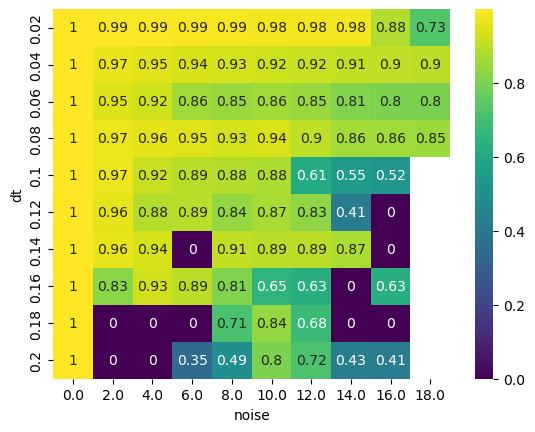

In [7]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

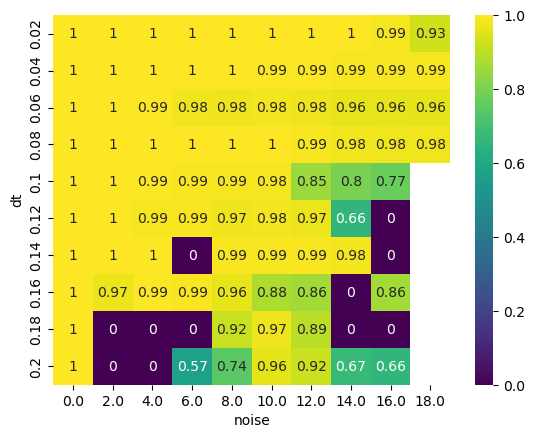

In [8]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

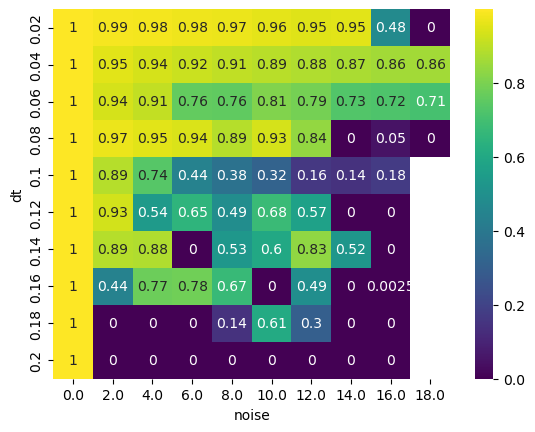

In [9]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
